### Deaths involving COVID-19, pneumonia, and influenza reported to NCHS by sex, age group, and jurisdiction of occurrence.
Last Updated
September 27, 202

data was collected between 2020-01-01 and 2023-09-23
#### In this project, we will dive deep into the data related to COVID-19 deaths and try to explain and predict the most vulnerable groups of people that might be affected by this virus.

* data_as_of - Date of Analysis (2023-09-27)	 - Floating Timestamp * start_date - First date of data period - Floating Timestamp
* end_date - Last date of data period - Floating Timestamp
* group - Indicator of whether data measured by Month, by Year, or Total - Text
* year - Year in which death occurred - Number
* month - Month in which death occurred - Number
* state - Jurisdiction of occurrence - Text
* sex - Sex - Text
* age_group - Age group - Text
* covid_19_deaths - Deaths involving COVID-19 (ICD-code U07.1) - Number
* total_deaths - Deaths from all causes of death - Number
* pneumonia_deaths - Pneumonia Deaths (ICD-10 codes J12.0-J18.9) - Number
* pneumonia_and_covid_19_deaths - Deaths with Pneumonia and COVID-19 (ICD-10 codes J12.0-J18.9 and U07.1) - Number
* influenza_deaths - Influenza Deaths (ICD-10 codes J09-J11) - Number
* pneumonia_influenza_or_covid - Deaths with Pneumonia, Influenza, or COVID-19 - Number
* footnote - Suppressed counts (1-9) - Text)	footnote	Text
)	footnote	Text



In [73]:
# Libraries to help with reading and manipulating data

import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
   
from sklearn.linear_model import LinearRegression

# Import necessary libraries
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor



# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    mean_squared_error,
    r2_score
)


# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [2]:
# Importing Dataset
df = pd.read_csv("covid19_final.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
data.head(5)

,group_id,data_as_of,start_date,end_date,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid
0,1000888,2023-09-27,2021-03-01,2021-03-31,By Month,2021.0,3.0,Georgia,Male,25-34 years,NaN,142.0,NaN,NaN,0.0,NaN
1,10040985,2023-09-27,2023-03-01,2023-03-31,By Month,2023.0,3.0,Virginia,Male,25-34 years,0.0,93.0,NaN,0.0,0.0,NaN
2,10433180,2023-09-27,2021-11-01,2021-11-30,By Month,2021.0,11.0,Idaho,Male,45-54 years,21.0,74.0,21.0,18.0,0.0,24.0
3,10460132,2023-09-27,2022-12-01,2022-12-31,By Month,2022.0,12.0,New Jersey,All Sexes,All Ages,411.0,7458.0,499.0,138.0,66.0,832.0
4,10505867,2023-09-27,2021-07-01,2021-07-31,By Month,2021.0,7.0,Nebraska,All Sexes,15-24 years,0.0,12.0,NaN,0.0,0.0,NaN


In [5]:
data.tail(5)

,group_id,data_as_of,start_date,end_date,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid
137873,9926135,2023-09-27,2022-09-01,2022-09-30,By Month,2022.0,9.0,Indiana,Female,Under 1 year,0.0,20.0,0.0,0.0,0.0,0.0
137874,99400339,2023-09-27,2023-01-01,2023-01-31,By Month,2023.0,1.0,Georgia,Male,All Ages,223.0,4752.0,318.0,81.0,16.0,476.0
137875,99660570,2023-09-27,2023-02-01,2023-02-28,By Month,2023.0,2.0,New York,Female,40-49 years,NaN,87.0,NaN,0.0,0.0,NaN
137876,9976773,2023-09-27,2021-05-01,2021-05-31,By Month,2021.0,5.0,Wyoming,All Sexes,25-34 years,NaN,NaN,NaN,NaN,0.0,NaN
137877,99979326,2023-09-27,2022-11-01,2022-11-30,By Month,2022.0,11.0,Missouri,Male,75-84 years,24.0,796.0,60.0,11.0,NaN,78.0


* Data is loaded correctrly

In [6]:
data.shape

(137878, 16)

* Dataset has 137878 rows and 16 columns

In [7]:
# Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137878 entries, 0 to 137877
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   group_id                       137878 non-null  int64  
 1   data_as_of                     137878 non-null  object 
 2   start_date                     137878 non-null  object 
 3   end_date                       137878 non-null  object 
 4   group                          137878 non-null  object 
 5   year                           135122 non-null  float64
 6   month                          124090 non-null  float64
 7   state                          137878 non-null  object 
 8   sex                            137878 non-null  object 
 9   age_group                      137878 non-null  object 
 10  covid_19_deaths                94483 non-null   float64
 11  total_deaths                   113627 non-null  float64
 12  pneumonia_deaths              

* The dataset has a integer, object and float data types.
* Some datatypes are incorrect and we will try to convert them in the next steps
* The dependant variable covid_19_deaths is float data type

In [8]:
# Checking for missing values
data.isnull().sum()

group_id                             0
data_as_of                           0
start_date                           0
end_date                             0
group                                0
year                              2756
month                            13788
state                                0
sex                                  0
age_group                            0
covid_19_deaths                  43395
total_deaths                     24251
pneumonia_deaths                 48591
pneumonia_and_covid_19_deaths    40932
influenza_deaths                 31156
pneumonia_influenza_or_covid     48044
dtype: int64

* As we are evaluating the COVID-19 death statistics, all rows that have missing data in covid_19_deaths column have no statistical importance for us, and we can drop them.
  

#### The decision to drop those rows was also influenced by the fact that we are looking for ways to reduce the dimensions of the dataset, as the modeling will be performed on a local machine with limited resources. In different circumstances, another approach could be implemented.

In [9]:
# Drop rows where 'covid_19_deaths' column has missing data
data = data.dropna(subset=['covid_19_deaths'])

In [10]:
# Checking for missing values once again after we dropped the missing values rows in covid 19 column
data.isnull().sum()

group_id                             0
data_as_of                           0
start_date                           0
end_date                             0
group                                0
year                              2198
month                            10139
state                                0
sex                                  0
age_group                            0
covid_19_deaths                      0
total_deaths                     17288
pneumonia_deaths                 17369
pneumonia_and_covid_19_deaths    11472
influenza_deaths                 19819
pneumonia_influenza_or_covid     16508
dtype: int64

* As we are analyzing the COVID-19 death statistics, the rows that have missing data in the total_deaths column also have no statistical significance for us, and we can drop them.

In [11]:
# Drop rows where 'total_deaths' column has missing data
data = data.dropna(subset=['total_deaths'])

In [12]:
# Checking for missing values again after we dropped the rows with missing values in the total_deaths column.
data.isnull().sum()

group_id                             0
data_as_of                           0
start_date                           0
end_date                             0
group                                0
year                              2194
month                             9942
state                                0
sex                                  0
age_group                            0
covid_19_deaths                      0
total_deaths                         0
pneumonia_deaths                 15438
pneumonia_and_covid_19_deaths    11472
influenza_deaths                 19342
pneumonia_influenza_or_covid     14179
dtype: int64

* After dropping the rows with missing values in the COVID-19 and total_deaths columns, we also significantly reduced the missing data rows in other columns, which means many of those rows had missing data in multiple columns.
* Next, we will transform the data types.

In [13]:
# Convert the 'data_as_of', 'start_date', and 'end_date' columns to datetime
data['data_as_of'] = pd.to_datetime(data['data_as_of'], errors='coerce').dt.normalize()
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce').dt.normalize()
data['end_date'] = pd.to_datetime(data['end_date'], errors='coerce').dt.normalize()

# Convert 'year' and 'month' columns to integer   
# Int64 allows for missing (NA) values
data['year'] = data['year'].astype('Int64')
data['month'] = data['month'].astype('Int64')

# Convert the death-related columns from float to integer 
data['covid_19_deaths'] = data['covid_19_deaths'].astype('Int64')
data['total_deaths'] = data['total_deaths'].astype('Int64')
data['pneumonia_deaths'] = data['pneumonia_deaths'].astype('Int64')
data['pneumonia_and_covid_19_deaths'] = data['pneumonia_and_covid_19_deaths'].astype('Int64')
data['influenza_deaths'] = data['influenza_deaths'].astype('Int64')
data['pneumonia_influenza_or_covid'] = data['pneumonia_influenza_or_covid'].astype('Int64')

In [14]:
data.head(5)

,group_id,data_as_of,start_date,end_date,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid
1,10040985,2023-09-27,2023-03-01,2023-03-31,By Month,2023,3,Virginia,Male,25-34 years,0,93,<NA>,0,0,<NA>
2,10433180,2023-09-27,2021-11-01,2021-11-30,By Month,2021,11,Idaho,Male,45-54 years,21,74,21,18,0,24
3,10460132,2023-09-27,2022-12-01,2022-12-31,By Month,2022,12,New Jersey,All Sexes,All Ages,411,7458,499,138,66,832
4,10505867,2023-09-27,2021-07-01,2021-07-31,By Month,2021,7,Nebraska,All Sexes,15-24 years,0,12,<NA>,0,0,<NA>
5,10596986,2023-09-27,2020-06-01,2020-06-30,By Month,2020,6,Ohio,Male,18-29 years,0,169,<NA>,0,0,<NA>


In [15]:
# Checking again the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77195 entries, 1 to 137877
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   group_id                       77195 non-null  int64         
 1   data_as_of                     77195 non-null  datetime64[ns]
 2   start_date                     77195 non-null  datetime64[ns]
 3   end_date                       77195 non-null  datetime64[ns]
 4   group                          77195 non-null  object        
 5   year                           75001 non-null  Int64         
 6   month                          67253 non-null  Int64         
 7   state                          77195 non-null  object        
 8   sex                            77195 non-null  object        
 9   age_group                      77195 non-null  object        
 10  covid_19_deaths                77195 non-null  Int64         
 11  total_deaths       

* As we can see the dataset columns data types has corrected

In [16]:
# Checking for duplicates 
data.duplicated().sum()

0

* Dataset has no dublicates

In [18]:
# Checking the summary of the dataset.
data.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
group_id,77195.0,NaN,NaN,NaN,49912000.593899,558.0,25011810.5,49998513.0,74805875.0,99998892.0,28828951.73267
data_as_of,77195,NaN,NaN,NaN,2023-09-27 00:00:00,2023-09-27 00:00:00,2023-09-27 00:00:00,2023-09-27 00:00:00,2023-09-27 00:00:00,2023-09-27 00:00:00,NaN
start_date,77195,NaN,NaN,NaN,2021-09-02 15:01:25.202409472,2020-01-01 00:00:00,2020-10-01 00:00:00,2021-09-01 00:00:00,2022-09-01 00:00:00,2023-09-01 00:00:00,NaN
end_date,77195,NaN,NaN,NaN,2021-12-10 06:24:46.635144704,2020-01-31 00:00:00,2020-12-31 00:00:00,2021-12-31 00:00:00,2022-12-31 00:00:00,2023-09-23 00:00:00,NaN
group,77195,3,By Month,67253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,75001.0,<NA>,<NA>,<NA>,2021.338542,2020.0,2020.0,2021.0,2022.0,2023.0,1.08892
month,67253.0,<NA>,<NA>,<NA>,6.122032,1.0,3.0,6.0,9.0,12.0,3.428431
state,77195,54,United States,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,77195,3,All Sexes,27589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_group,77195,17,All Ages,7284,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The 'group' column has 3 unique values, with 'By Month' being the most frequent.
* The 'state' column contains 54 unique values, including more than 50 existing states. We will check what these values are.
* The 'age_group' column has 17 different age geoups, we will check them separetly

In [19]:
# Checking the count of each unique category in each of the categorical variables

# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)
    

group
By Month    67253
By Year      7748
By Total     2194
Name: count, dtype: int64
--------------------------------------------------
state
United States           2449
California              1863
Texas                   1820
Florida                 1782
Ohio                    1667
North Carolina          1665
Tennessee               1662
Pennsylvania            1652
Georgia                 1633
Illinois                1633
Michigan                1600
Arizona                 1594
Kentucky                1577
Alabama                 1560
Indiana                 1553
Missouri                1553
New Jersey              1546
Washington              1534
South Carolina          1533
Virginia                1528
New York                1517
New York City           1512
Maryland                1492
Oklahoma                1488
Colorado                1475
Massachusetts           1469
Mississippi             1460
Arkansas                1457
Wisconsin               1454
Minnesota       

* The 'group' column includes categories for monthly, yearly, and total deaths, with 'by month' having the most records. To ensure consistency in our analysis, we'll keep only the 'by month' category and drop 'by year' and 'all' in the next steps.
* The 'state' column has 54 entries, which means some of them are mislabeled. For example, 'United States' is not a state and will disrupt our analysis, so we will drop all rows with that category. Additionally, Washington DC is a separate entity, but we are more interested in territorial segregation rather than administrative independence. Therefore, we will merge it with Maryland, as it is surrounded by Maryland and can be considered part of its territory. Another example is NYC, which is not a state and will be merged with New York state. Finally, Puerto Rico (PR) is not an official state, but it is a U.S. territory, so we will keep it as is.
* The 'age group' column needs to be reorganized, as some categories are overlapping. The 'All ages' category will be dropped, as it does not provide useful information about specific age group deaths and is irrelevant to our analysis and modeling.

In [20]:
# Keep only the rows 'By Month' in the 'group' column
data = data[data['group'] == 'By Month']

In [21]:
# Since the 'group' column now only contains 'By Month', it no longer provides useful statistical information and can be dropped.
# Drop the 'group' column
data = data.drop('group', axis=1)

In [22]:
# Drop rows where 'state' is 'United States'
data.drop(data[data['state'] == 'United States'].index, inplace=True)

In [23]:
# Replace 'New York City' with 'New York' in the 'state' column
data['state'] = data['state'].replace('New York City', 'New York')

In [24]:
# Replace 'District of Columbia' with 'Maryland' in the 'state' column
data['state'] = data['state'].replace('District of Columbia', 'Maryland')

In [25]:
# Drop rows where 'age_group' is 'All Ages'
data.drop(data[data['age_group'] == 'All Ages'].index, inplace=True)

In [26]:
# Reorganizing the age_group column to remove overlapping

# Create a dictionary to map the old age categories to the numeric midpoints
age_numeric_map = {
    'Under 1 year': 2.5,         # 'Under 1 year' was mapped to 2.5 (midpoint of 0-4 years)
    '0-17 years': 10,            # '0-17 years' was mapped to 10 (midpoint of 5-14 years, merged with '5-14 years')
    '1-4 years': 2.5,            # '1-4 years' was mapped to 2.5 (midpoint of 0-4 years)
    '5-14 years': 10,            # '5-14 years' was mapped to 10 (midpoint of 5-14 years)
    '15-24 years': 20,           # '15-24 years' was mapped to 20 (midpoint of 15-24 years)
    '18-29 years': 20,           # '18-29 years' was mapped to 20 (merged with 15-24 years)
    '25-34 years': 30,           # '25-34 years' was mapped to 30 (midpoint of 25-34 years)
    '30-39 years': 30,           # '30-39 years' was mapped to 30 (merged with 25-34 years)
    '35-44 years': 40,           # '35-44 years' was mapped to 40 (midpoint of 35-44 years)
    '40-49 years': 40,           # '40-49 years' was mapped to 40 (merged with 35-44 years)
    '45-54 years': 50,           # '45-54 years' was mapped to 50 (midpoint of 45-54 years)
    '50-64 years': 60,           # '50-64 years' was mapped to 60 (merged with 55-64 years)
    '55-64 years': 60,           # '55-64 years' was mapped to 60 (midpoint of 55-64 years)
    '65-74 years': 70,           # '65-74 years' was mapped to 70 (midpoint of 65-74 years)
    '75-84 years': 80,           # '75-84 years' was mapped to 80 (midpoint of 75-84 years)
    '85 years and over': 90      # '85 years and over' was mapped to 90 (midpoint of 85 years and over)
}

# Apply the numeric mapping to the 'age_group' column
data['age_group'] = data['age_group'].replace(age_numeric_map)

In [27]:
# Drop the 'group_id' column as it does not hold any statistical information
data = data.drop('group_id', axis=1)

In [28]:
# Checkin the uniqe values in 'data_as_of' column
data['data_as_of'].unique()

<DatetimeArray>
['2023-09-27 00:00:00']
Length: 1, dtype: datetime64[ns]

* The 'data_as_of' column contains the same value for all rows, which is the Date of Analysis (2023-09-27) as stated in the dataset description. Since it has no statistical value, we can drop this column.

In [29]:
# Drop the 'data_as_of' column as it does not hold any statistical information
data = data.drop('data_as_of', axis=1)

In [30]:
data['end_date'].unique()

<DatetimeArray>
['2023-03-31 00:00:00', '2021-11-30 00:00:00', '2021-07-31 00:00:00',
 '2020-06-30 00:00:00', '2022-11-30 00:00:00', '2020-09-30 00:00:00',
 '2023-05-31 00:00:00', '2023-09-23 00:00:00', '2020-10-31 00:00:00',
 '2021-12-31 00:00:00', '2020-08-31 00:00:00', '2022-09-30 00:00:00',
 '2020-03-31 00:00:00', '2023-02-28 00:00:00', '2021-04-30 00:00:00',
 '2022-01-31 00:00:00', '2020-01-31 00:00:00', '2022-04-30 00:00:00',
 '2022-03-31 00:00:00', '2022-12-31 00:00:00', '2022-05-31 00:00:00',
 '2021-10-31 00:00:00', '2023-07-31 00:00:00', '2023-04-30 00:00:00',
 '2022-10-31 00:00:00', '2021-01-31 00:00:00', '2021-08-31 00:00:00',
 '2022-07-31 00:00:00', '2021-05-31 00:00:00', '2023-08-31 00:00:00',
 '2021-09-30 00:00:00', '2022-06-30 00:00:00', '2020-07-31 00:00:00',
 '2022-02-28 00:00:00', '2021-03-31 00:00:00', '2020-02-29 00:00:00',
 '2021-02-28 00:00:00', '2021-06-30 00:00:00', '2020-11-30 00:00:00',
 '2020-04-30 00:00:00', '2020-12-31 00:00:00', '2023-06-30 00:00:00',
 '20

In [31]:
# Extract the year and month from 'end_date'
data['end_year'] = data['end_date'].dt.year
data['end_month'] = data['end_date'].dt.month

# Compare 'year' and 'month' columns with 'end_year' and 'end_month'
comparison_result = (data['year'] == data['end_year']) & (data['month'] == data['end_month'])

# Display the comparison result
print(comparison_result)

1         True
2         True
4         True
5         True
13        True
          ... 
137868    True
137870    True
137871    True
137873    True
137877    True
Length: 58672, dtype: boolean


In [32]:
# Check the unique values in the comparison_result and count them
comparison_counts = comparison_result.value_counts()

# Display the counts
print(comparison_counts)

True    58672
Name: count, dtype: Int64


* As we can see, the 'year' and 'month' columns represent the exact same year and month as the 'end_date' column and do not add any value to the dataset. Therefore, we can drop the 'year' and 'month' columns.

In [33]:
# Drop the 'year', 'month', 'end_year' and 'end_month'  columns
data = data.drop(['year', 'month', 'end_year', 'end_month'], axis=1)

In [34]:
# Reset the index without adding the old index as a column
data = data.reset_index(drop=True)

In [35]:
data.head()

,start_date,end_date,state,sex,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid
0,2023-03-01,2023-03-31,Virginia,Male,30.0,0,93,<NA>,0,0,<NA>
1,2021-11-01,2021-11-30,Idaho,Male,50.0,21,74,21,18,0,24
2,2021-07-01,2021-07-31,Nebraska,All Sexes,20.0,0,12,<NA>,0,0,<NA>
3,2020-06-01,2020-06-30,Ohio,Male,20.0,0,169,<NA>,0,0,<NA>
4,2022-11-01,2022-11-30,Delaware,All Sexes,40.0,0,37,0,0,0,0


In [36]:
# checking the number of days in each period. (difference between 'start_date' and 'end_date' in days)
data['days'] = (data['end_date'] - data['start_date']).dt.days
data['days'] = data['days'].astype('Int64')
data.days.value_counts()

days
30    34074
29    17759
27     3773
28     1947
22     1119
Name: count, dtype: Int64

* As we can see, not all periods are equal; they vary between 22 and 30 days.

In [37]:
# Find the earliest date in the 'start_date' column
earliest_start_date = data['start_date'].min()

# Find the latest date in the 'end_date' column
latest_end_date = data['end_date'].max()

# Display the results
print("Earliest start date:", earliest_start_date)
print("Latest end date:", latest_end_date)

Earliest start date: 2020-01-01 00:00:00
Latest end date: 2023-09-23 00:00:00


* As we can see, all of the data was collected between 2020-01-01 and 2023-09-23, totaling 1,362 days of data.

In [38]:
# Checking missing values once again
data.isnull().sum()

start_date                           0
end_date                             0
state                                0
sex                                  0
age_group                            0
covid_19_deaths                      0
total_deaths                         0
pneumonia_deaths                 14465
pneumonia_and_covid_19_deaths     9455
influenza_deaths                 11853
pneumonia_influenza_or_covid     13257
days                                 0
dtype: int64

* We still have some columns with missing values
* Let's check what are the summary for those columns

In [41]:
# Checking the summary of the dataset.
data.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
start_date,58672,NaN,NaN,NaN,2021-09-30 08:05:05.808562944,2020-01-01 00:00:00,2020-11-01 00:00:00,2021-10-01 00:00:00,2022-09-01 00:00:00,2023-09-01 00:00:00,NaN
end_date,58672,NaN,NaN,NaN,2021-10-29 14:56:08.802835968,2020-01-31 00:00:00,2020-11-30 00:00:00,2021-10-31 00:00:00,2022-09-30 00:00:00,2023-09-23 00:00:00,NaN
state,58672,51,New York,2393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,58672,3,All Sexes,21221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_group,58672.0,NaN,NaN,NaN,45.135243,2.5,20.0,40.0,70.0,90.0,27.788055
covid_19_deaths,58672.0,<NA>,<NA>,<NA>,45.304558,0.0,0.0,0.0,35.0,8720.0,145.719168
total_deaths,58672.0,<NA>,<NA>,<NA>,439.987353,0.0,27.0,129.0,547.0,119449.0,918.181908
pneumonia_deaths,58672.0,<NA>,<NA>,<NA>,49.322709,0.0,0.0,24.0,47.0,9659.0,111.655816
pneumonia_and_covid_19_deaths,58672.0,<NA>,<NA>,<NA>,22.10436,0.0,0.0,0.0,16.0,4274.0,80.480433
influenza_deaths,58672.0,<NA>,<NA>,<NA>,0.365847,0.0,0.0,0.0,0.0,269.0,3.650228


* The most appropriate way to treat them appears to be imputing with the median.

In [42]:
# Impute missing values with the median for specified columns
columns_to_impute = [
    'pneumonia_deaths',
    'pneumonia_and_covid_19_deaths',
    'influenza_deaths',
    'pneumonia_influenza_or_covid'
]

# Impute with median for each of the columns in the list
for column in columns_to_impute:
    median_value = data[column].median()  # Calculate median
    data[column].fillna(median_value, inplace=True)  # Fill NaN with median

In [43]:
data.isnull().sum()

start_date                       0
end_date                         0
state                            0
sex                              0
age_group                        0
covid_19_deaths                  0
total_deaths                     0
pneumonia_deaths                 0
pneumonia_and_covid_19_deaths    0
influenza_deaths                 0
pneumonia_influenza_or_covid     0
days                             0
dtype: int64

* We Fixed missiing values with imputing the median method 

## EDA 

### Univariate Analysis

In [44]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [45]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

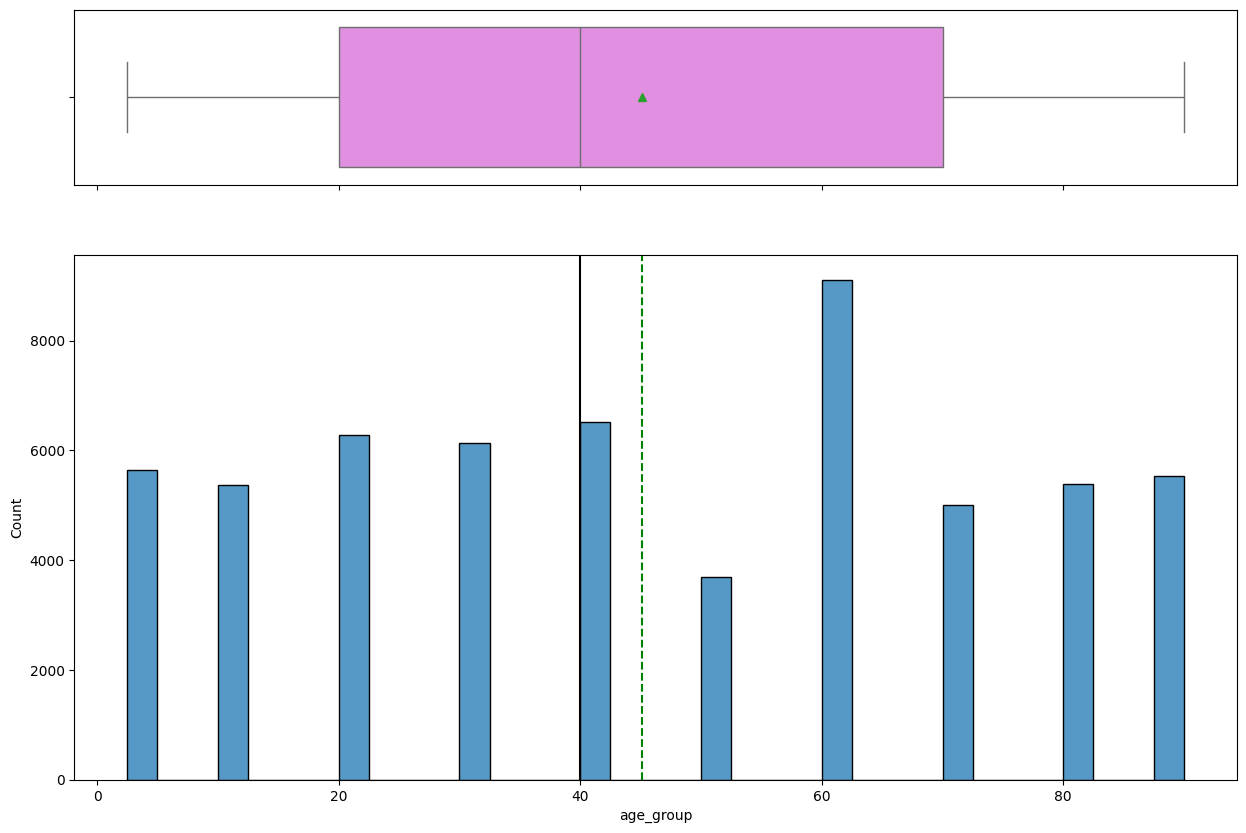

In [46]:
histogram_boxplot(data, "age_group")

* The most frequent age group in the dataset is 60 years old and the least frequent is 50 years old.

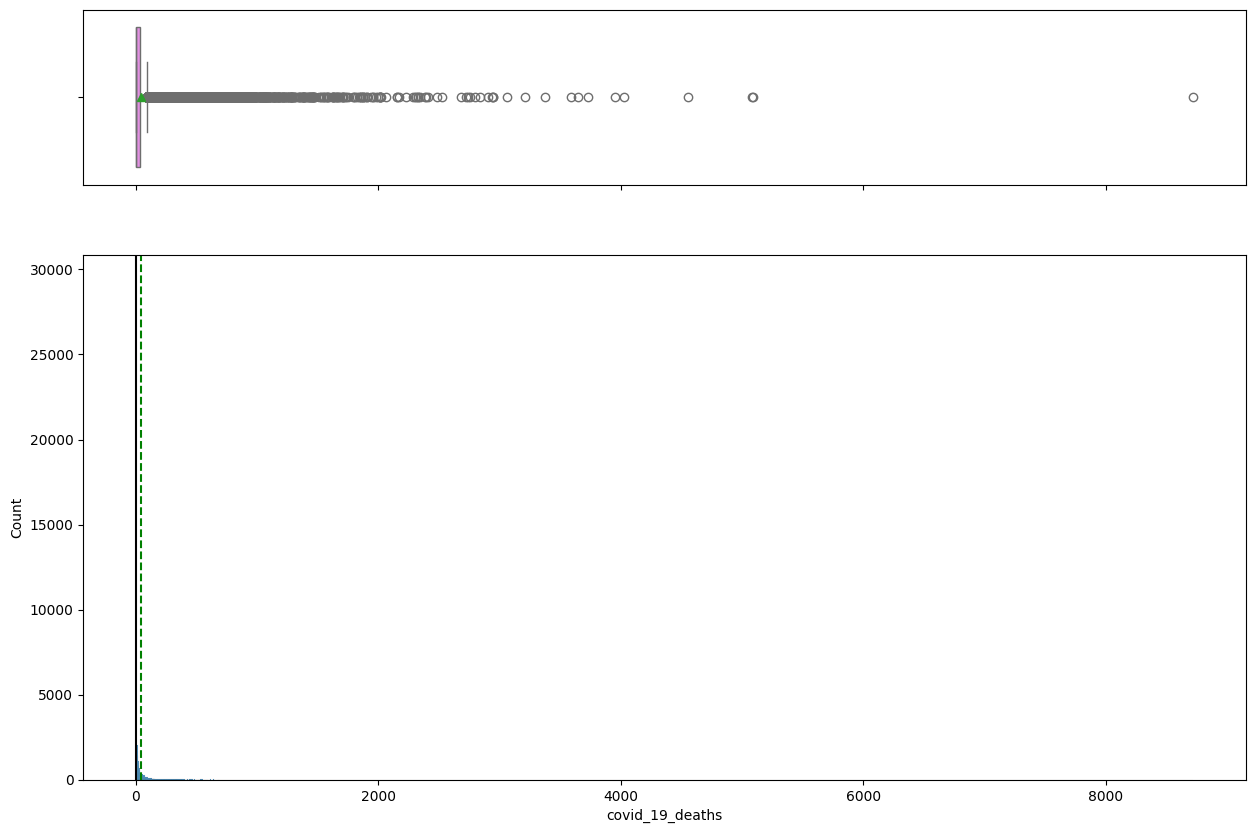

In [47]:
histogram_boxplot(data, "covid_19_deaths")

* As we can see on the box plot, we have many outliers on the right side of the whisker. However, we will not treat them, as this is COVID data, and we know that there was a significant surge in sickness, so these outliers may represent real values.
* The histplot is heavily skewed to the right.

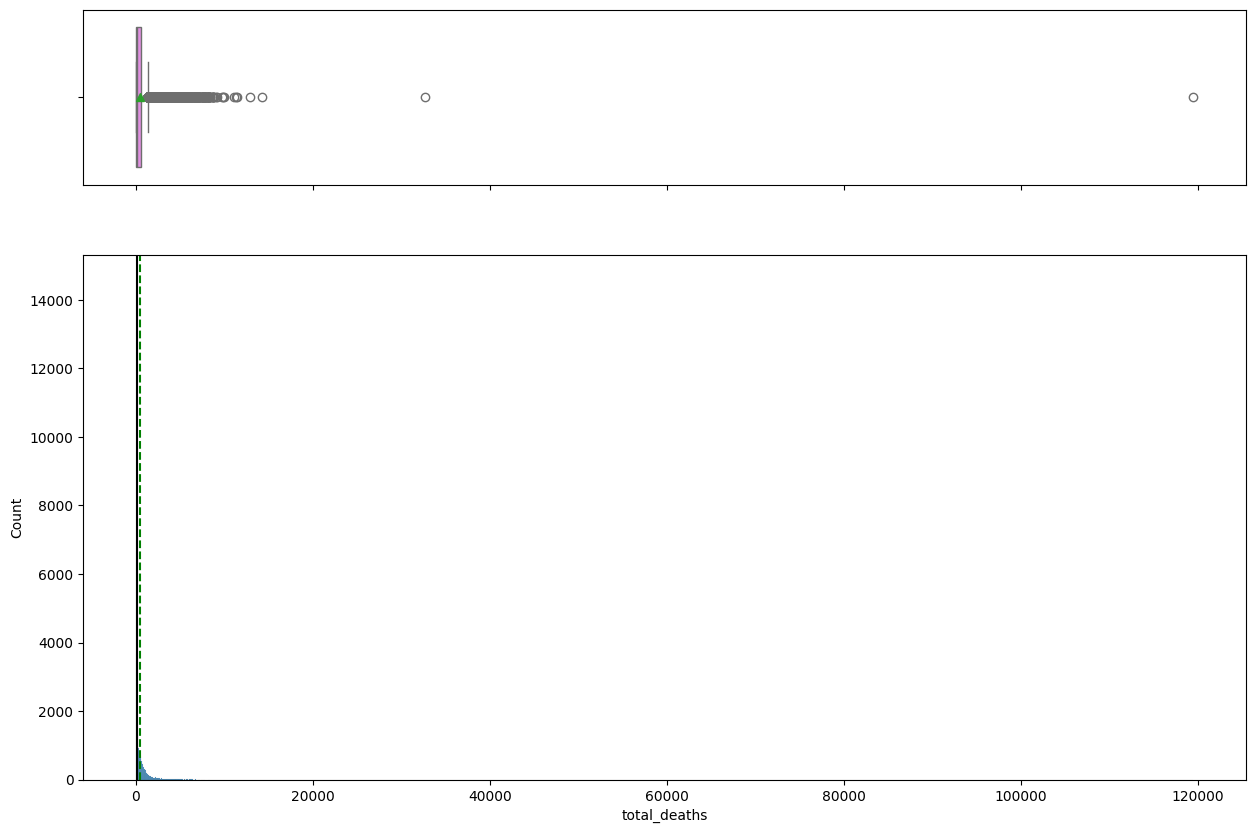

In [48]:
histogram_boxplot(data, "total_deaths")

* Similar to the previous graph, we have outliers on the right side of the boxplot, and the data is heavily skewed to the right in the histogram.

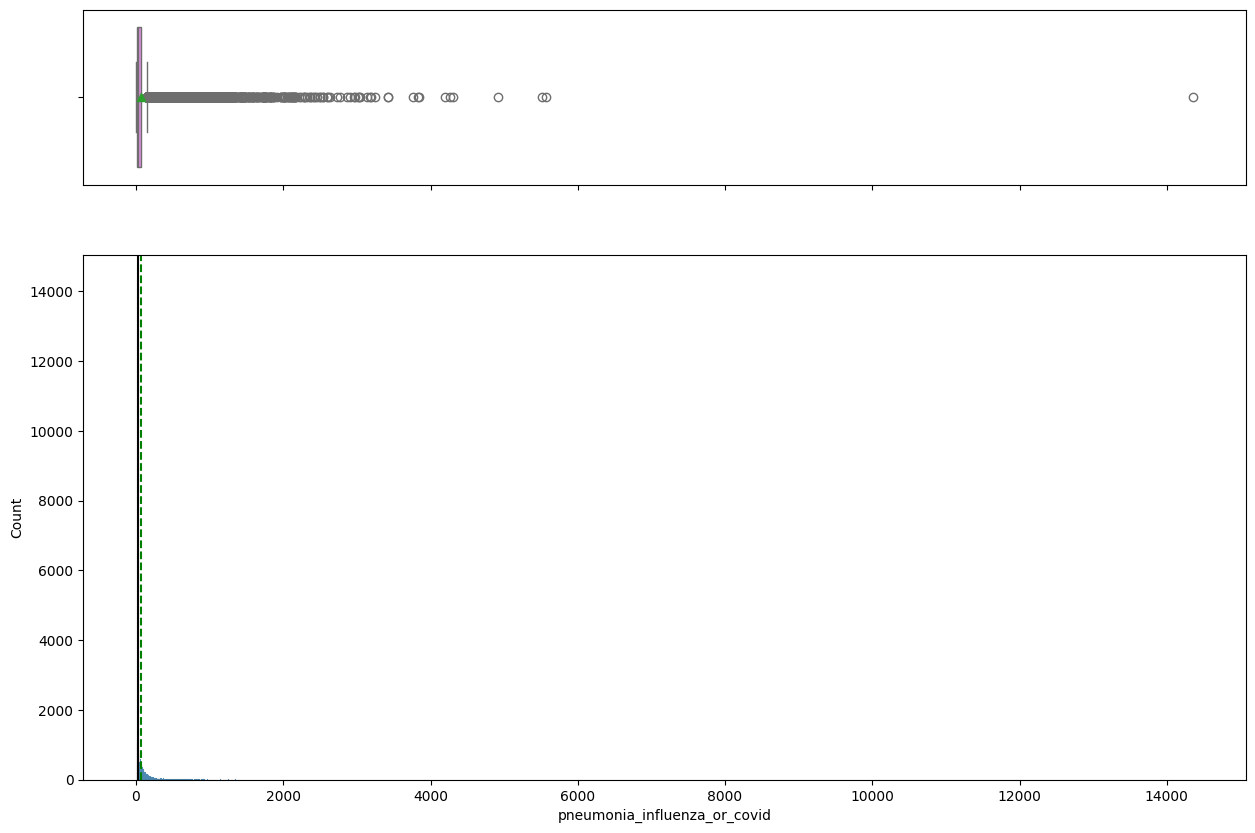

In [49]:
histogram_boxplot(data, "pneumonia_influenza_or_covid")

* Similar to the previous graphs, we have outliers on the right side of the boxplot, and the data is heavily skewed to the right in the histogram.

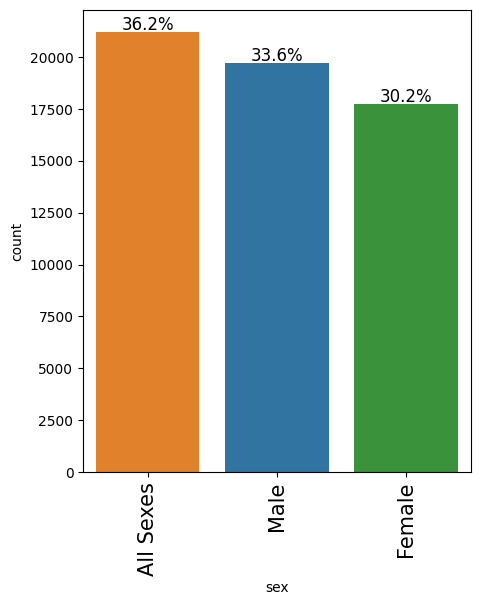

In [50]:
labeled_barplot(data, "sex", perc=True)

* Records with male gender are 3.4 percent higher then female records  

### Multivariate Analysis

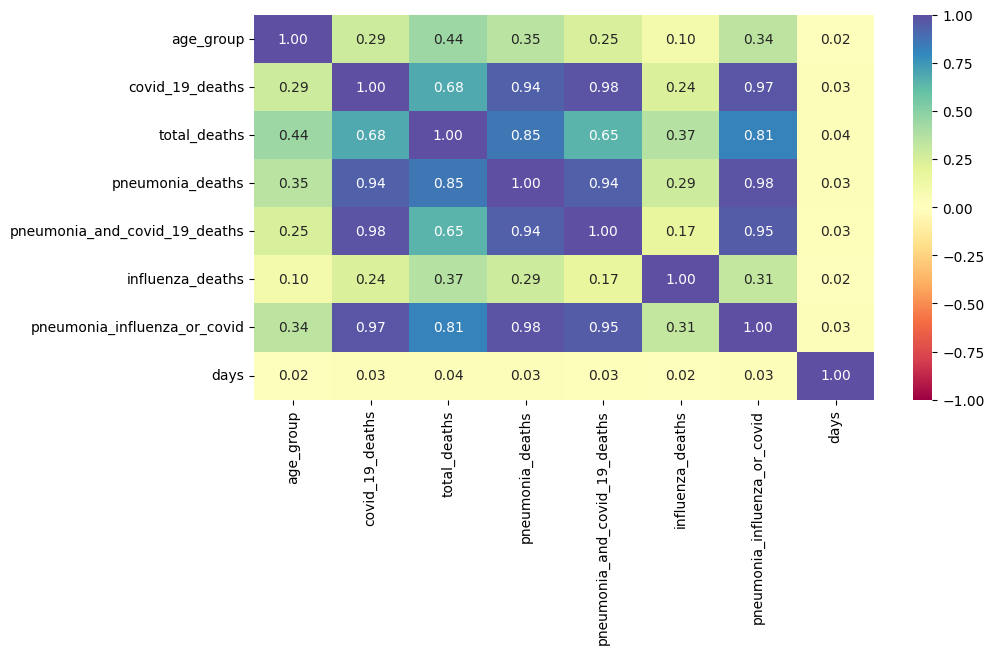

In [51]:
# Creating a list of numerical columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()
# Creating a heatmap to check the correlation between different columns.
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The heatmap does not provide clear information; we will try other methods.

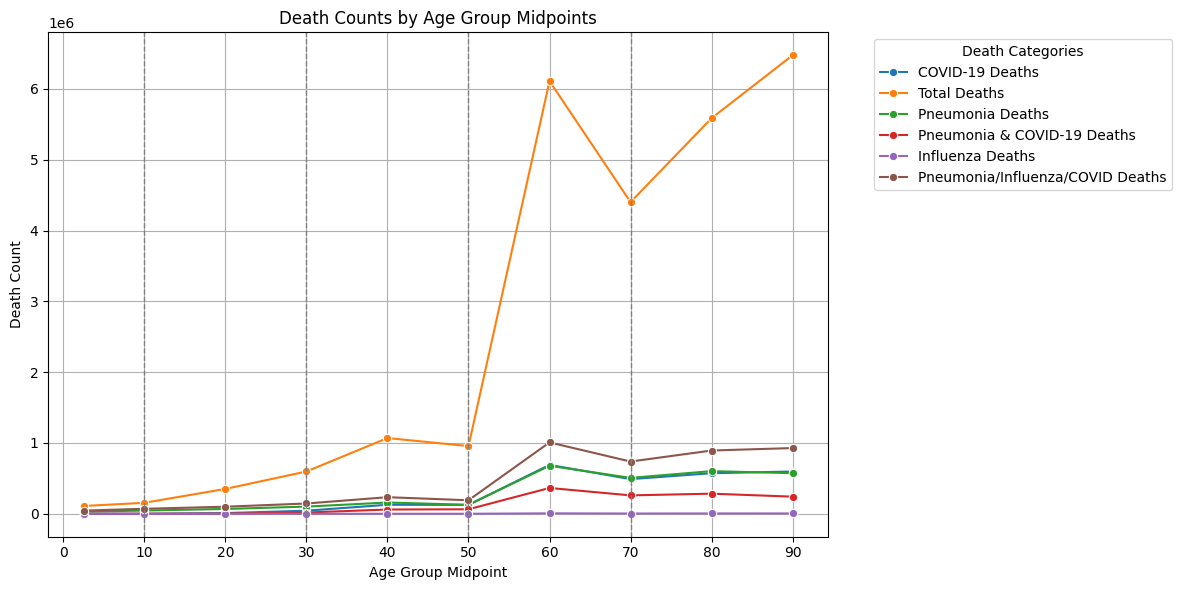

In [52]:
# Group by the age groups and aggregate the death counts
age_group_deaths = data.groupby('age_group')[['covid_19_deaths', 'total_deaths', 
                                             'pneumonia_deaths', 'pneumonia_and_covid_19_deaths', 
                                             'influenza_deaths', 'pneumonia_influenza_or_covid']].sum()

# Create a line plot to show how death counts change across age group midpoints
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_group_deaths, x='age_group', y='covid_19_deaths', label='COVID-19 Deaths', marker='o')
sns.lineplot(data=age_group_deaths, x='age_group', y='total_deaths', label='Total Deaths', marker='o')
sns.lineplot(data=age_group_deaths, x='age_group', y='pneumonia_deaths', label='Pneumonia Deaths', marker='o')
sns.lineplot(data=age_group_deaths, x='age_group', y='pneumonia_and_covid_19_deaths', label='Pneumonia & COVID-19 Deaths', marker='o')
sns.lineplot(data=age_group_deaths, x='age_group', y='influenza_deaths', label='Influenza Deaths', marker='o')
sns.lineplot(data=age_group_deaths, x='age_group', y='pneumonia_influenza_or_covid', label='Pneumonia/Influenza/COVID Deaths', marker='o')

# Add gridlines and vertical lines
plt.grid(True)
for x in [10, 30, 50, 70]:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# Adjust x-ticks to represent age group midpoints
plt.xticks(ticks=range(0, 91, 10))

# Title and labels
plt.title('Death Counts by Age Group Midpoints')
plt.xlabel('Age Group Midpoint')
plt.ylabel('Death Count')

# Add legend and adjust layout
plt.legend(title='Death Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

* As we can see from the graph above, the number of COVID-19 deaths follows almost the same pattern as pneumonia deaths.
* From the graph, we can see that the number of deaths from COVID-19 significantly increases with age, and the chances of death overall are much higher in the age group of 60 and above.

  start_date  covid_19_deaths
0 2020-01-01                0
1 2020-02-01              170
2 2020-03-01            15393
3 2020-04-01           150413
4 2020-05-01            87541


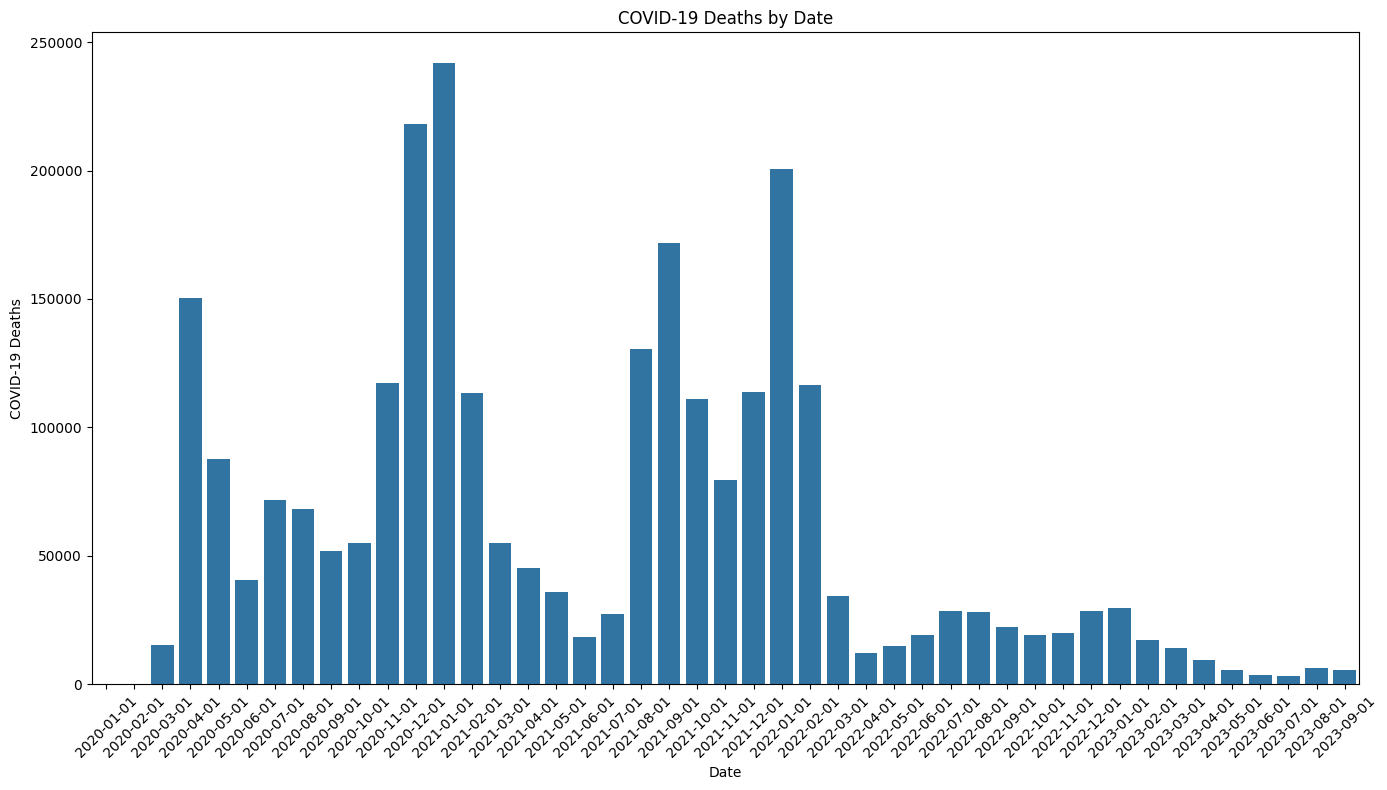

In [53]:
# Group by 'start_date' and sum the 'covid_19_deaths'
date_deaths = data.groupby('start_date')['covid_19_deaths'].sum().reset_index()

# Check the first few rows to ensure it looks good
print(date_deaths.head())

# Set figure size for the plot
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(data=date_deaths, x='start_date', y='covid_19_deaths')
# Adding title and labels
plt.title('COVID-19 Deaths by Date')
plt.xlabel('Date')
plt.ylabel('COVID-19 Deaths')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for tight fitting
plt.tight_layout()

# Show the plot
plt.show()

* As we can see, we experienced 4 peaks of COVID-19 deaths around March 2020, November-December 2020, August 2021, and December 2021, with death counts over 150k during those months.

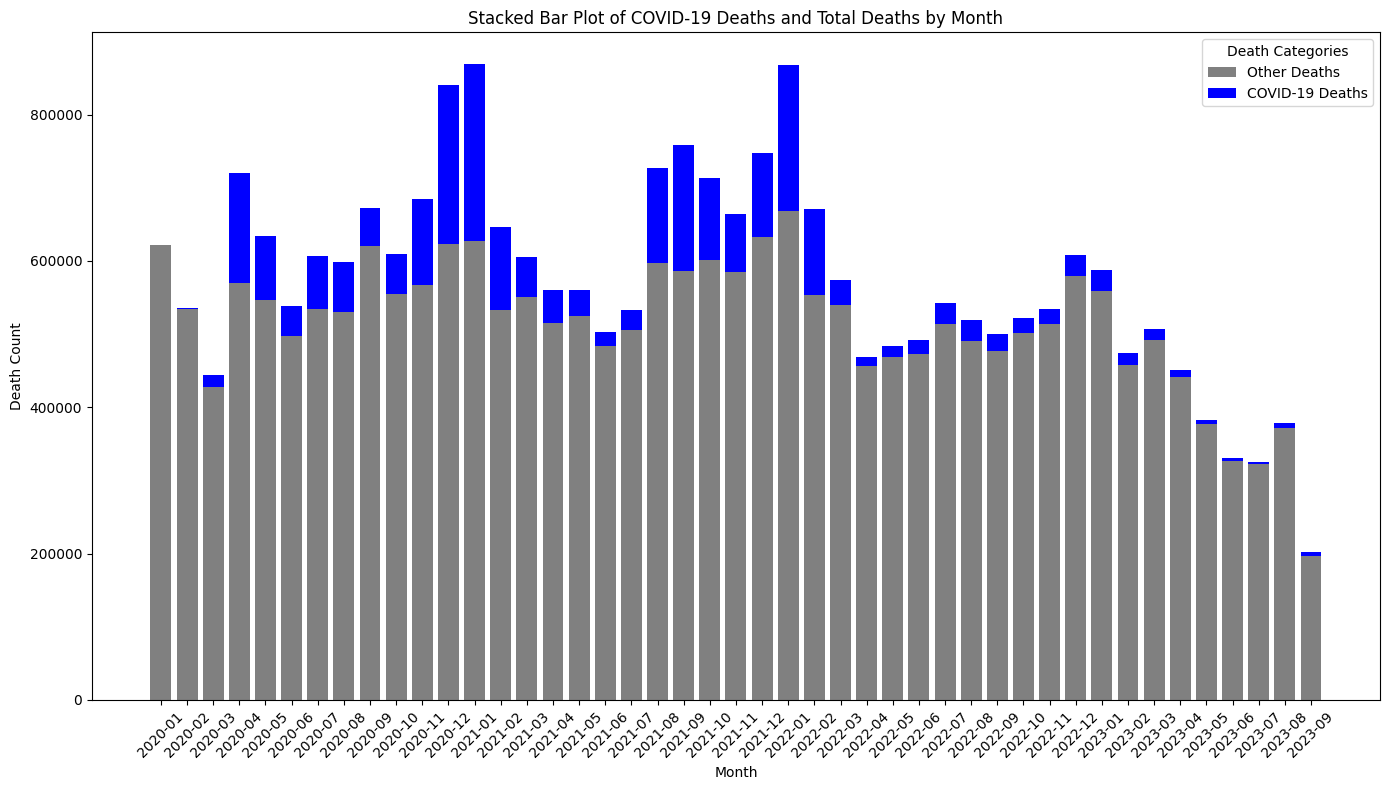

In [54]:
# Visualizing the number of covid tdeath compared to the number of total death over time

# Step 1: Group by start_date and aggregate the total deaths and COVID-19 deaths for each month
date_deaths = data.groupby(data['start_date'].dt.to_period('M'))[['covid_19_deaths', 'total_deaths']].sum().reset_index()

# Step 2: Calculate the remaining deaths (Total deaths - COVID-19 deaths)
date_deaths['other_deaths'] = date_deaths['total_deaths'] - date_deaths['covid_19_deaths']

# Step 3: Plot the stacked bar plot
plt.figure(figsize=(14, 8))

# Create the stacked bar plot by plotting the other deaths first, then plotting COVID-19 deaths on top
plt.bar(date_deaths['start_date'].astype(str), date_deaths['other_deaths'], label='Other Deaths', color='gray')
plt.bar(date_deaths['start_date'].astype(str), date_deaths['covid_19_deaths'], label='COVID-19 Deaths', color='blue', bottom=date_deaths['other_deaths'])

# Adding title and labels
plt.title('Stacked Bar Plot of COVID-19 Deaths and Total Deaths by Month')
plt.xlabel('Month')
plt.ylabel('Death Count')

plt.xticks(rotation=45)
plt.legend(title='Death Categories')
plt.tight_layout()
plt.show()

* From the visualization above, we can see the amount of COVID deaths compared to the total number of deaths for the same period of time.
* The highest death rates from COVID were in Nov-Dec 2020 and Dec 2021.

<Figure size 1400x800 with 0 Axes>

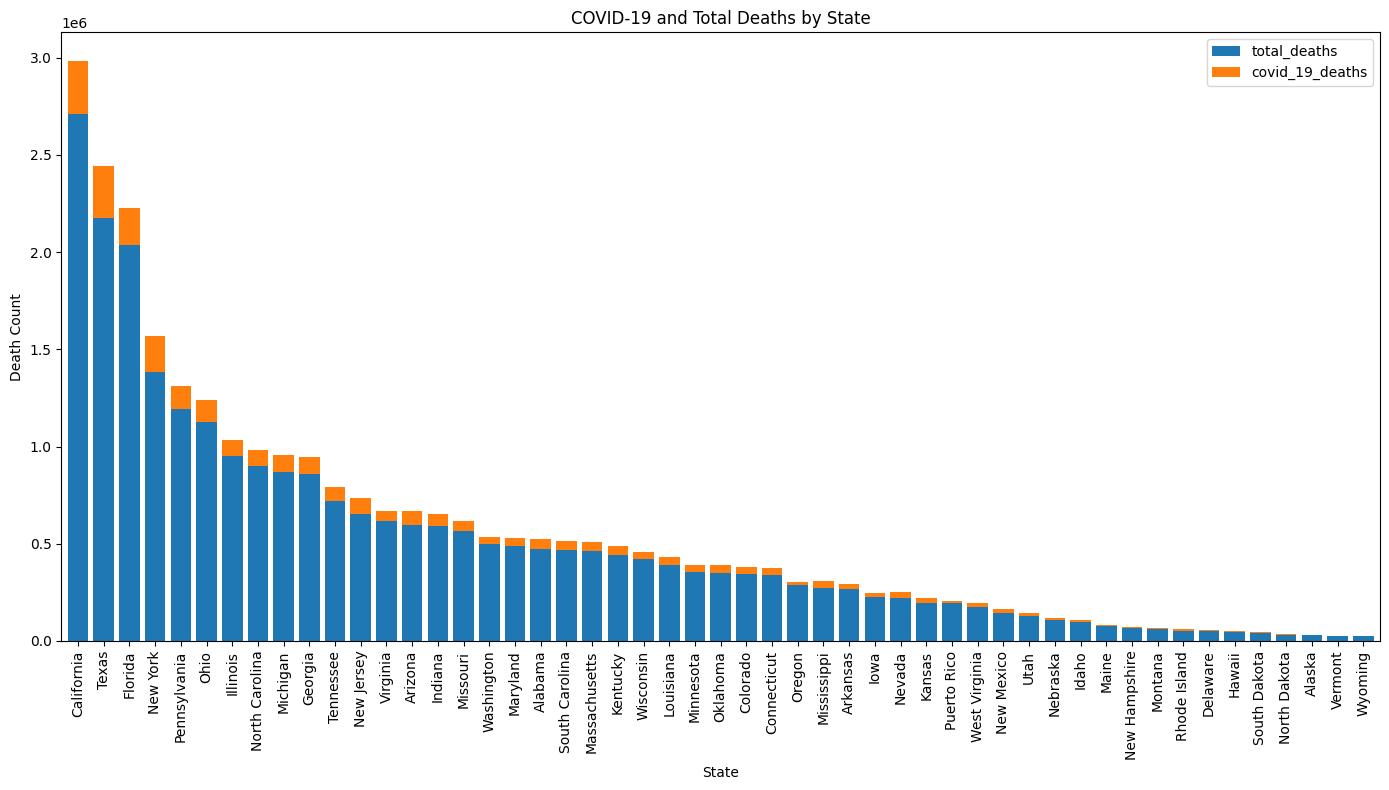

In [55]:
# Visualizing the number of covid deaths compared to the number of total death by state

# Group the data by 'state' and sum the 'covid_19_deaths' and 'total_deaths'
state_deaths = data.groupby('state')[['covid_19_deaths', 'total_deaths']].sum().reset_index()

# Sort the data by 'total_deaths' in descending order
state_deaths_sorted = state_deaths.sort_values(by='total_deaths', ascending=False)

# Set figure size
plt.figure(figsize=(14, 8))

# Create a stacked bar plot with 'covid_19_deaths' on top of 'total_deaths' for each state
state_deaths_sorted.set_index('state')[['total_deaths', 'covid_19_deaths']].plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)

# Adding title and labels
plt.title('COVID-19 and Total Deaths by State')
plt.xlabel('State')
plt.ylabel('Death Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for tight fitting
plt.tight_layout()

# Show the plot
plt.show()

* The graph shows total and COVID-19 deaths by U.S. state, with California, Texas, and Florida having the highest totals. Blue represents total deaths, and orange highlights COVID-19 deaths.

<Figure size 1400x800 with 0 Axes>

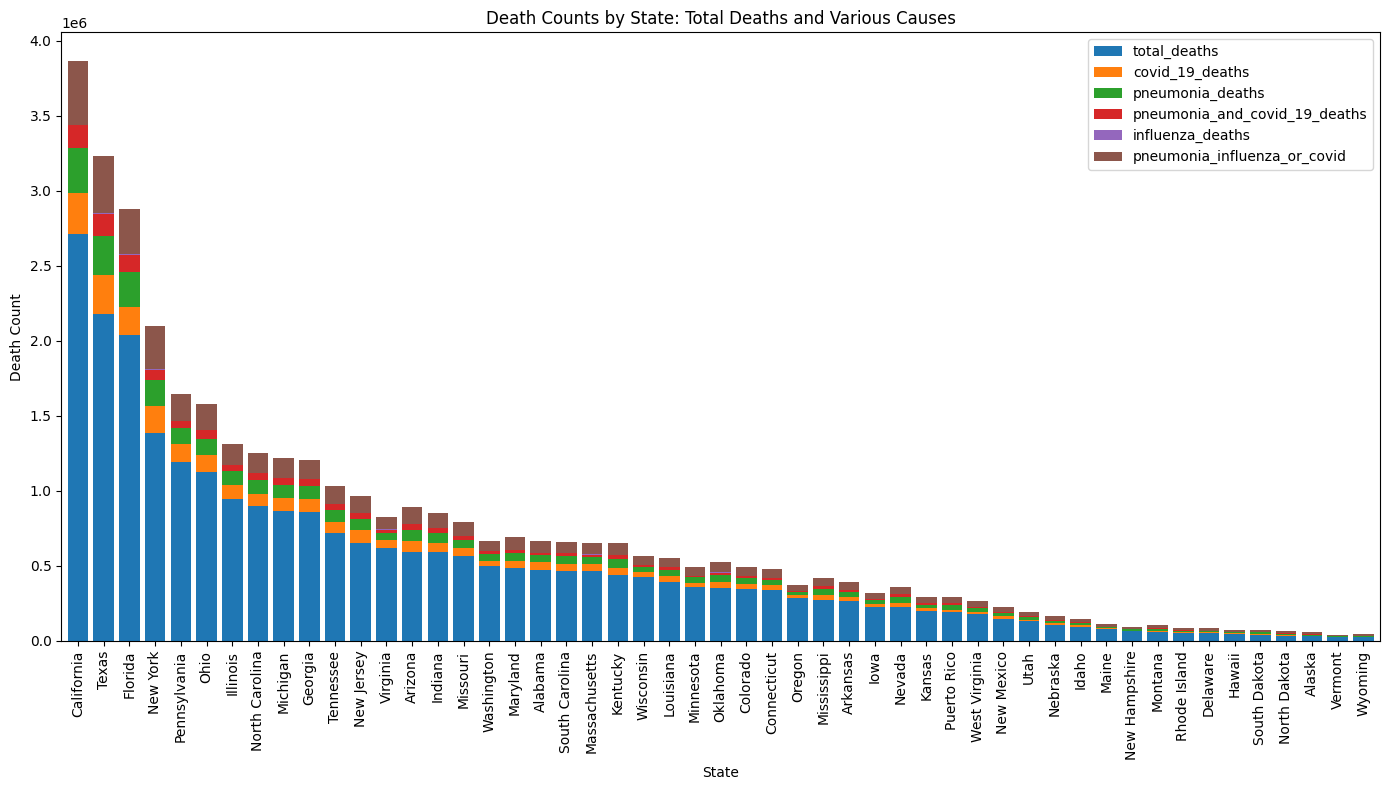

In [56]:
# Visualizing the proportion of all causes of death by state.

# Group the data by 'state' and sum the death columns
state_deaths = data.groupby('state')[['covid_19_deaths', 'total_deaths', 'pneumonia_deaths', 
                                      'pneumonia_and_covid_19_deaths', 'influenza_deaths', 
                                      'pneumonia_influenza_or_covid']].sum().reset_index()

# Sort the data by 'total_deaths' in descending order
state_deaths_sorted = state_deaths.sort_values(by='total_deaths', ascending=False)

# Set figure size
plt.figure(figsize=(14, 8))

# Create a stacked bar plot for all the death categories
state_deaths_sorted.set_index('state')[['total_deaths', 'covid_19_deaths', 'pneumonia_deaths', 
                                       'pneumonia_and_covid_19_deaths', 'influenza_deaths', 
                                       'pneumonia_influenza_or_covid']].plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)

# Adding title and labels
plt.title('Death Counts by State: Total Deaths and Various Causes')
plt.xlabel('State')
plt.ylabel('Death Count')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* As we can see from the graph above, California, Texas, Florida, and New York were the states with the most COVID deaths, as well as the highest number of total deaths and deaths from other diseases.
* On the other hand, the states with the lowest number of deaths are Wyoming, Vermont, Alaska, and North Dakota.

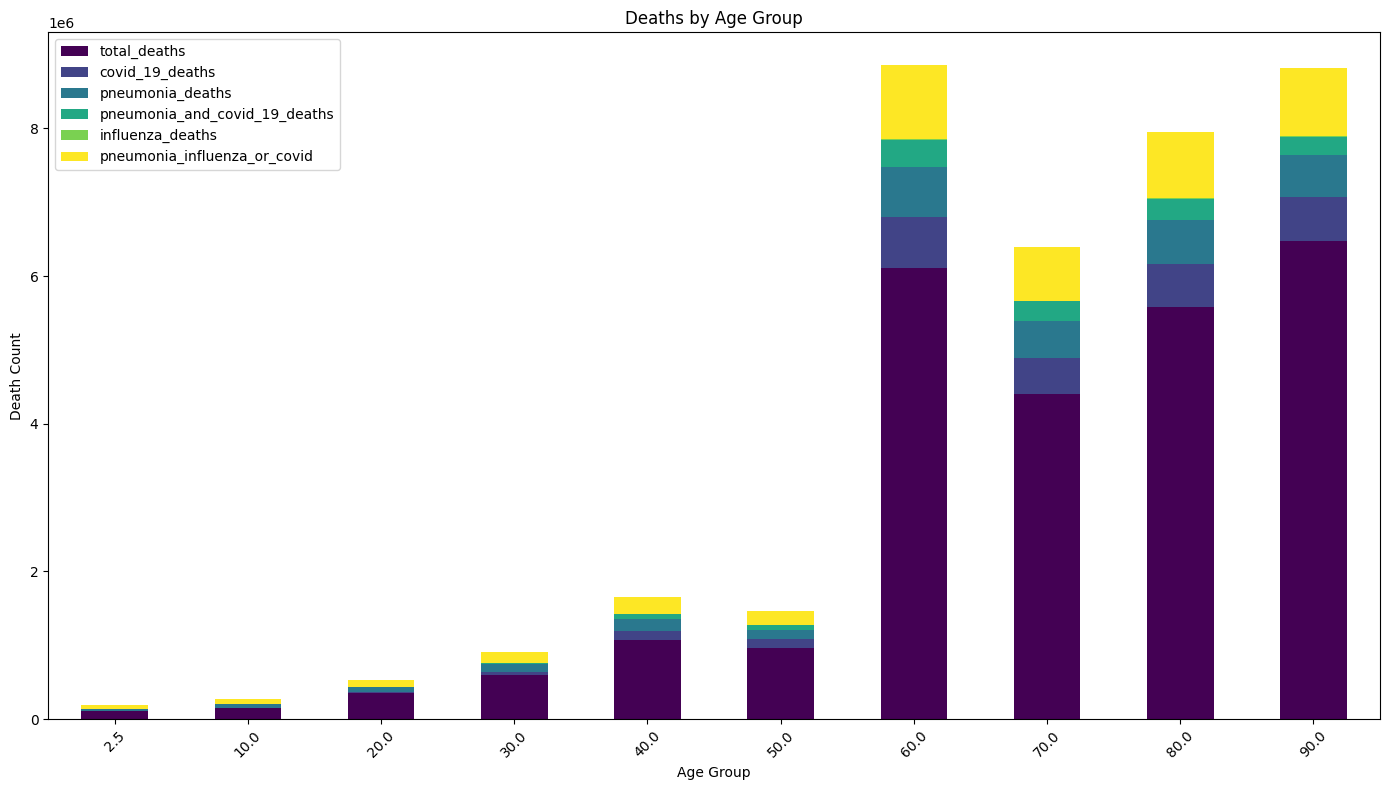

In [57]:
# Group the data by 'age_group' and sum the death counts
age_group_deaths = data.groupby('age_group')[['covid_19_deaths', 'total_deaths', 
                                              'pneumonia_deaths', 'pneumonia_and_covid_19_deaths', 
                                              'influenza_deaths', 'pneumonia_influenza_or_covid']].sum()

# Reorder the columns so that 'total_deaths' is at the base
ordered_columns = ['total_deaths', 'covid_19_deaths', 'pneumonia_deaths', 
                   'pneumonia_and_covid_19_deaths', 'influenza_deaths', 'pneumonia_influenza_or_covid']

# Create a stacked bar plot with 'total_deaths' at the base
ax = age_group_deaths[ordered_columns].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Adding title and labels
plt.title('Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for tight fitting
plt.tight_layout()

# Show the plot
plt.show()

* From the visualization above, we can see the proportions of causes of death sorted by age group.

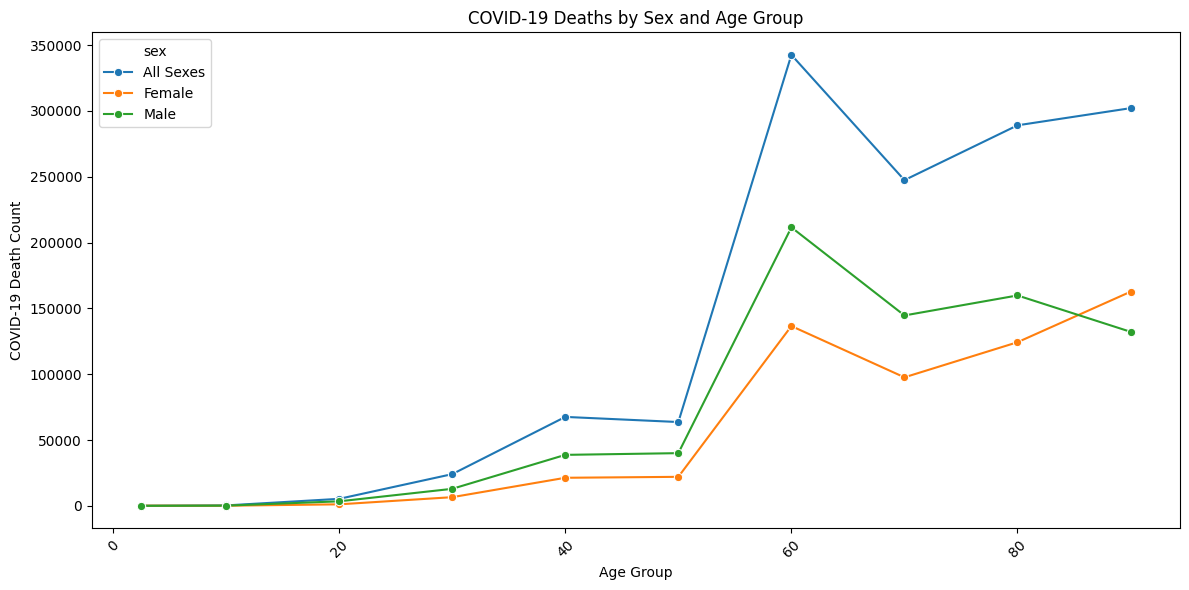

In [58]:
# Visualizing the number of COVID deaths for each sex, sorted by age.

# Group by 'age_group' and 'sex', and sum the 'covid_19_deaths'
age_sex_deaths = data.groupby(['age_group', 'sex'])['covid_19_deaths'].sum().reset_index()

# Create a line plot for COVID-19 deaths by sex across different age groups
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_sex_deaths, x='age_group', y='covid_19_deaths', hue='sex', marker='o')

# Add title and labels
plt.title('COVID-19 Deaths by Sex and Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Death Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for tight fitting
plt.tight_layout()

# Show the plot
plt.show()

* The graph shows that males have a higher number of COVID deaths in almost all age groups.

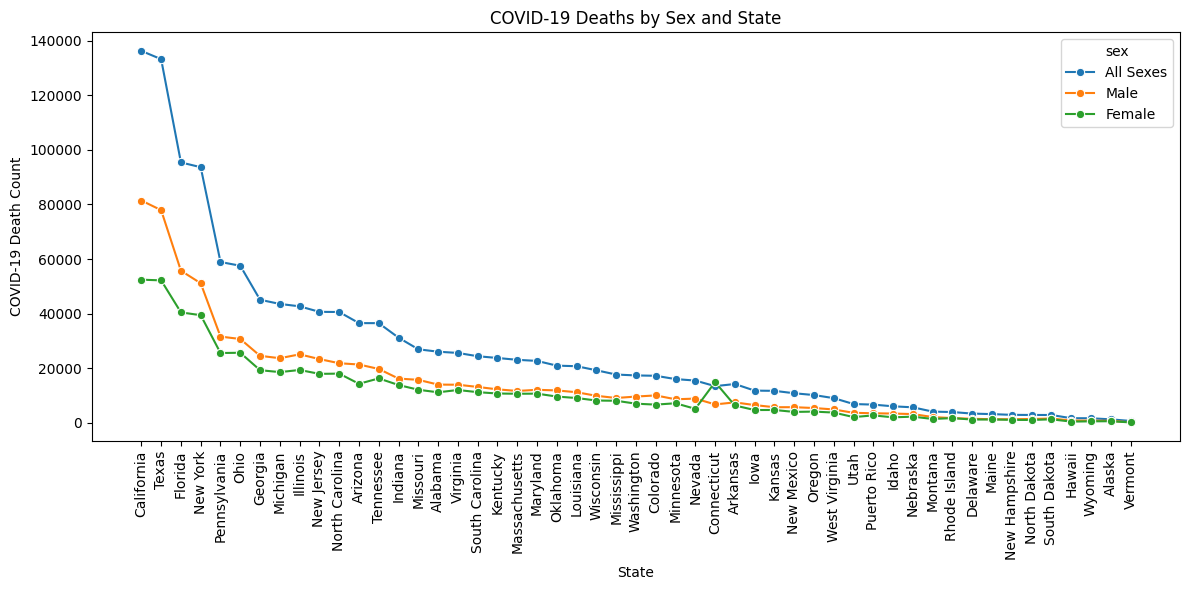

In [59]:
# Visualizing the number of COVID deaths by gender and state.

# Group by 'state' and 'sex', and sum the 'covid_19_deaths'
state_sex_deaths = data.groupby(['state', 'sex'])['covid_19_deaths'].sum().reset_index()

# Sort the data by 'covid_19_deaths' in descending order
state_sex_deaths_sorted = state_sex_deaths.sort_values(by='covid_19_deaths', ascending=False)

# Create a line plot for COVID-19 deaths by sex across different states
plt.figure(figsize=(12, 6))
sns.lineplot(data=state_sex_deaths_sorted, x='state', y='covid_19_deaths', hue='sex', marker='o')

# Add title and labels
plt.title('COVID-19 Deaths by Sex and State')
plt.xlabel('State')
plt.ylabel('COVID-19 Death Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for tight fitting
plt.show()  # Show the plot

* The graph shows COVID-19 deaths by sex, with males (orange) generally having more deaths than females (green). In Connecticut, female deaths briefly exceed male deaths.



### Data Preparation for Modeling

In [60]:
# Extract year, month, and day from 'start_date'
data['start_year'] = data['start_date'].dt.year
data['start_month'] = data['start_date'].dt.month
data['start_day'] = data['start_date'].dt.day

In [61]:
# Checking the unique values in the 'sart_day" column
data["start_day"].value_counts()

start_day
1    58672
Name: count, dtype: int64

* "All values in this column are 1, so it does not have any statistical impact. We can drop it.

In [62]:
# In preparation for modeling, we will be dropping all unnecessary columns that night effect data leakege or just unnecesary.
data_cleaned = data.drop(columns=['start_day', 'total_deaths', 'start_date', 'end_date', 'pneumonia_deaths', 'pneumonia_and_covid_19_deaths', 'influenza_deaths', 'pneumonia_influenza_or_covid', ])

In [80]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)
# Convert boolean values to integer 0/1
data_encoded = data_encoded.astype(int)

,age_group,covid_19_deaths,days,start_year,start_month,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,...,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,sex_Female,sex_Male
0,30,0,30,2023,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,50,21,29,2021,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,20,0,30,2021,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,0,29,2020,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,40,0,29,2022,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58667,80,20,30,2020,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
58668,70,350,30,2022,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
58669,10,0,30,2023,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58670,2,0,29,2022,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
# Separate the numerical features
numerical_features = data_encoded.select_dtypes(include=['number']).columns.tolist()
data_numerical = data_encoded[numerical_features]

In [83]:
# Define features (X) and target (y)
X = data_numerical.drop('covid_19_deaths', axis=1)
y = data_numerical['covid_19_deaths']

In [105]:
# Store feature names before scaling
feature_names = X.columns

In [84]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
# Split data into training (70%) and testing (30%) sets with random_state=1
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [86]:
# Check the shapes of the split datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (41070, 56)
X_test shape: (17602, 56)
y_train shape: (41070,)
y_test shape: (17602,)


## Building ML Models

#### Linear Regression

In [87]:
# Initialize the Linear Regression model
model = LinearRegression()
# Train the model using training data
model.fit(X_train, y_train)

LinearRegression()

In [88]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [89]:
#Evaluate the model's performance
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 14700.74560260514
R-squared: 0.19889830996402313


* Linear Regression performs poorly
* Let's check Variance Inflation Factor (VIF) to detect multicollinearity

In [90]:
# Variance Inflation Factor (VIF) analysis to detect multicollinearity and reduce redundant features if needed.
# Add constant to the features (required for VIF calculation)
X_with_constant = sm.add_constant(X_scaled)

# Convert it to a DataFrame
X_with_constant_df = pd.DataFrame(X_with_constant, columns=['const'] + list(X.columns))

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_constant_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_constant_df.values, i) for i in range(X_with_constant_df.shape[1])]

# Display the VIF values
print(vif_data)

                 feature       VIF
0                  const  1.000000
1              age_group  1.009615
2                   days  1.038325
3             start_year  1.049294
4            start_month  1.013175
5           state_Alaska  1.658042
6          state_Arizona  1.977839
7         state_Arkansas  1.880042
8       state_California  2.166066
9         state_Colorado  1.886955
10     state_Connecticut  1.809969
11        state_Delaware  1.636573
12         state_Florida  2.102738
13         state_Georgia  2.003471
14          state_Hawaii  1.578881
15           state_Idaho  1.747316
16        state_Illinois  2.001913
17         state_Indiana  1.947907
18            state_Iowa  1.810287
19          state_Kansas  1.828024
20        state_Kentucky  1.965866
21       state_Louisiana  1.862831
22           state_Maine  1.694905
23        state_Maryland  2.479746
24   state_Massachusetts  1.891597
25        state_Michigan  1.979384
26       state_Minnesota  1.874086
27     state_Mississ

* VIF between 1 and 3 generally indicates low to moderate multicollinearity, which is acceptable.This means that independent variables are not highly correlated with each other, so model should be stable.

* Given that linear regression performed poorly, we'll try different model

### DecisionTree

In [91]:
# Initialize Decision Tree Regressor with some constraints to avoid overfitting
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=1)
# Train on the dataset
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=1)

In [92]:
# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")

Decision Tree Mean Squared Error: 13017.25015241641
Decision Tree R-squared: 0.2906386261881928


* Decision Tree performed slightly better than Linear Regression, but it's still not great.
* Next we'll try to tune Decision Tree with pre prunning method

In [93]:
# Define the pre-pruning parameter grid
param_grid = {
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=1)

# Perform GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Pre-Pruning Parameters:", grid_search.best_params_)
best_prepruned_dt = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_prepruned_dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Pre-Pruned Decision Tree Mean Squared Error:", mse)
print("Pre-Pruned Decision Tree R-squared:", r2)

Best Pre-Pruning Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Pre-Pruned Decision Tree Mean Squared Error: 8529.872557153563
Pre-Pruned Decision Tree R-squared: 0.53517355472662


* The R² increased from 0.29 to 0.53, and MSE dropped significantly.
* Let's try Cost Complexity (Post) Pruning now

In [94]:
# Define a range of ccp_alpha values
ccp_alphas = [0.0001, 0.001, 0.01, 0.1, 1]

# Perform grid search with pruning parameter
param_grid = {
    'ccp_alpha': ccp_alphas,
    'max_depth': [None, 10, 20, 30],  # Limit tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 5]     # Minimum samples per leaf
}

tree = DecisionTreeRegressor(random_state=1)
grid_search = GridSearchCV(tree, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and results
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_
mse = mean_squared_error(y_test, best_tree.predict(X_test))
r2 = r2_score(y_test, best_tree.predict(X_test))

print("Best Parameters:", best_params)
print("Pruned Decision Tree Mean Squared Error:", mse)
print("Pruned Decision Tree R-squared:", r2)

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Pruned Decision Tree Mean Squared Error: 8533.395695266232
Pruned Decision Tree R-squared: 0.534981565015854


* Pre-pruned and post-pruned results are nearly identical
* Decision Tree’s R² = 0.537 (which is decent but not great)
* Let's try anouyher model

### XGBoost

In [95]:
# Train XGBoost Model
xgb_regressor = xgb.XGBRegressor(objective="reg:squarederror", random_state=1)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [96]:
# Predictions & Evaluation
y_pred_xgb = xgb_regressor.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")

XGBoost Mean Squared Error: 4138.665228645465
XGBoost R-squared: 0.774467785594938


*  XGBoost is doing a much better job than Decision Trees.
*  Since the R² is 0.77, it means the model explains about 77% of the variance in Covid-19 deaths, which is solid.

* Let's Hyperparameter Tuning and see if we can impruve the model further.

In [97]:
# XGBoost Tuning

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of different combinations to try
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best Parameters & Performance
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned XGBoost Mean Squared Error:", mse)
print("Tuned XGBoost R-squared:", r2)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Tuned XGBoost Mean Squared Error: 3052.72795820482
Tuned XGBoost R-squared: 0.833644796485385


* Tuned XGBoost results show a significant imprivement 
* Mean Squared Error (MSE) dropped from 4138.67 to 2832.84
* R-squared increased from 0.774 to 0.846
* Let's check the most important features

In [104]:
# Feature Importance from XGBoost
feature_importance = best_xgb.feature_importances_

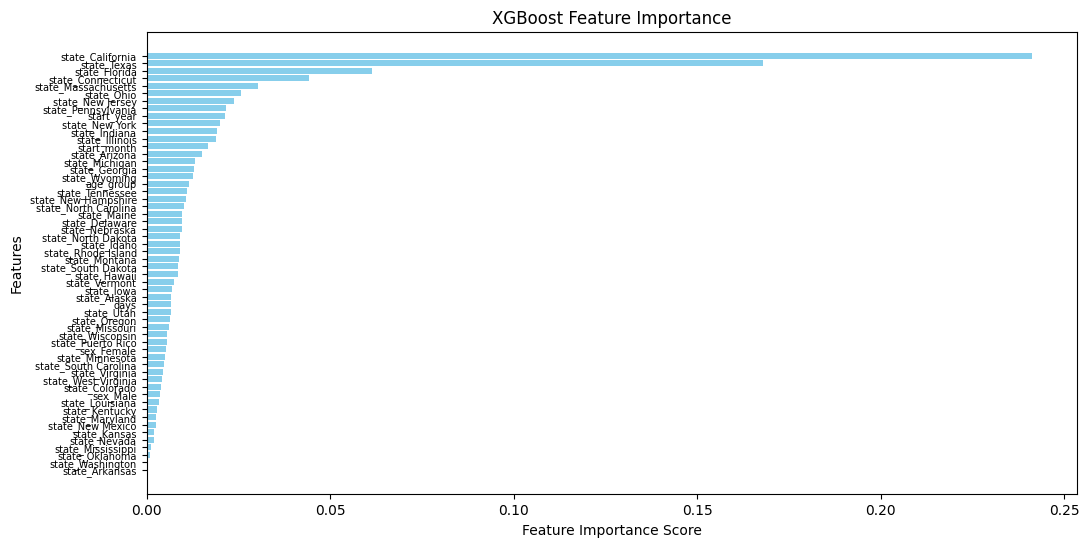

                 Feature  Importance
7       state_California    0.241230
46           state_Texas    0.167872
11         state_Florida    0.061437
9      state_Connecticut    0.044337
23   state_Massachusetts    0.030327
37            state_Ohio    0.025598
32      state_New Jersey    0.023907
40    state_Pennsylvania    0.021601
2             start_year    0.021241
34        state_New York    0.019931
16         state_Indiana    0.019260
15        state_Illinois    0.018915
3            start_month    0.016618
5          state_Arizona    0.015199
24        state_Michigan    0.013238
12         state_Georgia    0.013029
53         state_Wyoming    0.012631
0              age_group    0.011498
45       state_Tennessee    0.010969
31   state_New Hampshire    0.010625
35  state_North Carolina    0.010086
21           state_Maine    0.009750
10        state_Delaware    0.009652
29        state_Nebraska    0.009639
36    state_North Dakota    0.009241
14           state_Idaho    0.009172
4

In [112]:
# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})


# Sort features by importance
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.yticks(fontsize=7)
plt.show()

# Display the top 10 most important features
print(feat_importance_df.head(54))

* State-based features dominate the importance rankings.
* Age was expected to be more significant but ranked low.
* This suggests that location might be a stronger predictor of Covid-19 deaths in the dataset.

#### We will choose the tuned XGBoost model as it achieved nearly 85% accuracy on unseen data, which is decent performance.

### Conclusions

* Age Group Distribution: The most frequent age group in the dataset is 60 years old, while the least frequent is 50 years old.
* Outliers: The dataset contains several outliers, especially on the right side of the whisker, likely due to COVID surges, so they are considered valid and not removed.
* Gender Distribution: Male records are 3.4% higher than female records in the dataset.
* Death Patterns: COVID-19 deaths follow similar patterns to pneumonia deaths, with a notable increase in deaths as age rises, particularly for individuals aged 60 and above.
* Geographic Distribution: States like California, Texas, and Florida have the highest number of COVID deaths, while Wyoming, Vermont, Alaska, and North Dakota report the lowest.
* Model Performance: The tuned XGBoost model showed significant improvement with an R² of 0.85, offering decent performance on unseen data, outperforming previous models like Decision Trees and Linear Regression.
* Feature Importance: State-based features dominate the importance rankings, while age group, which was expected to be a significant predictor, is relatively less influential.